# Experimental data of lithium-ion batteries under galvanostatic discharge tests at different rates and temperatures of operation

### About the data in this notebook:
* Data downloaded from: https://data.mendeley.com/datasets/kxsbr4x3j2/2 (on 17/05/2025)
* stored and unzipped locally
* Original article: https://www.sciencedirect.com/science/article/pii/S2352340921001785?via%3Dihub
* Data generated with an Arbin tester and its associated software, MITS Pro-software and Data Watcher

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Load data

### mount google drive

In [ ]:
### access to drive
try:
    from google.colab import drive
    drive.mount('/content/drive')
    drive_mounted = True
except Exception as e:
    drive_mounted = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = "/content/drive/My Drive/Colab Notebooks/personal projects/galvanostatic_discharge_test/LFP/05degC" #G:\My Drive\Colab Notebooks\personal projects\galvanostatic_discharge_test\LFP

data = pd.DataFrame()
print_count = 0
for i, filename in enumerate(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)

    if os.path.isfile(file_path) and file_path.endswith('.xlsx'):
        # Example: Read CSV files
        # if filename.endswith('.csv'):

        print(f"\nReading {filename}")
        temp_df = pd.read_excel(file_path)
        temp_df['file'] = filename
        # Do something with df
        if print_count == 0:
            display(temp_df.head())
        print_count += 1
        data = pd.concat([data, temp_df])
        print(f"data now has {len(data)} rows!")

print("All done!")


Reading LFP_k1_3C_05degC.xlsx


,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Voltage(V),Current(A),Surface_Temp(degC),file
0,2019-11-19 10:19:43.065,1.0004,1.0002,1,3.164373,0.0,6.710077,LFP_k1_3C_05degC.xlsx
1,2019-11-19 10:19:44.065,2.0004,2.0002,1,3.164435,0.0,6.727111,LFP_k1_3C_05degC.xlsx
2,2019-11-19 10:19:45.065,3.0004,3.0002,1,3.164454,0.0,6.727111,LFP_k1_3C_05degC.xlsx
3,2019-11-19 10:19:46.066,4.0013,4.0011,1,3.164497,0.0,6.727111,LFP_k1_3C_05degC.xlsx
4,2019-11-19 10:19:47.066,5.0009,5.0007,1,3.164391,0.0,6.661114,LFP_k1_3C_05degC.xlsx


data now has 13260 rows!

Reading LFP_k3_5C_05degC.xlsx
data now has 23954 rows!

Reading LFP_k5_20C_05degC.xlsx
data now has 37082 rows!

Reading LFP_k2_2C_05degC.xlsx
data now has 51924 rows!

Reading LFP_k6_2C_05degC.xlsx
data now has 66217 rows!

Reading LFP_k6_1C_05degC.xlsx
data now has 82029 rows!

Reading LFP_k4_0_05C_05degC.xlsx
data now has 171968 rows!

Reading LFP_k3_10C_05degC.xlsx
data now has 185440 rows!

Reading LFP_k4_15C_05degC.xlsx
data now has 198609 rows!

Reading LFP_k2_15C_05degC.xlsx
data now has 211699 rows!

Reading LFP_k6_0_05C_05degC.xlsx
data now has 300359 rows!

Reading LFP_k6_10C_05degC.xlsx
data now has 313611 rows!

Reading LFP_k6_15C_05degC.xlsx
data now has 326814 rows!

Reading LFP_k1_10C_05degC.xlsx
data now has 337225 rows!

Reading LFP_k3_1C_05degC.xlsx
data now has 352093 rows!

Reading LFP_k4_3C_05degC.xlsx
data now has 365985 rows!

Reading LFP_k2_20C_05degC.xlsx
data now has 376535 rows!

Reading LFP_k6_20C_05degC.xlsx
data now has 389572 ro

In [ ]:
data.shape

(1091279, 8)

## separating the info from filename

In [ ]:
def info_from_filename(filename):
    if "0_05C" in filename:
        filename = filename.replace("0_05C", "0.05C")
    sample, k_num, c_rate, temperature = filename.split("_")
    try:
        temperature = int(temperature[:temperature.find('degC')])
    except Exception as e:
        print(f"Couldn't convert the temperature to int:\n\ttemperature = {temperature}\n\tException: {e}")

    try:
        c_rate = float(c_rate[:-1])
    except Exception as e:
        print(f"Couldn't convert the c_rate to float:\n\tc_rate = {c_rate}\n\tException: {e}")
    return sample, k_num, c_rate, temperature

print("Testing:", filename)
print(info_from_filename(filename))

Testing: LFP_k2_0_05C_05degC.xlsx
('LFP', 'k2', 0.05, 5)


In [ ]:
data[['battery', 'sample_num', 'C_rate', 'Temp_C']] = data.file.apply(info_from_filename).apply(pd.Series)

data.head()

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Voltage(V),Current(A),Surface_Temp(degC),file,battery,sample_num,C_rate,Temp_C
0,2019-11-19 10:19:43.065,1.0004,1.0002,1,3.164373,0.0,6.710077,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5
1,2019-11-19 10:19:44.065,2.0004,2.0002,1,3.164435,0.0,6.727111,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5
2,2019-11-19 10:19:45.065,3.0004,3.0002,1,3.164454,0.0,6.727111,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5
3,2019-11-19 10:19:46.066,4.0013,4.0011,1,3.164497,0.0,6.727111,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5
4,2019-11-19 10:19:47.066,5.0009,5.0007,1,3.164391,0.0,6.661114,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5


# EDA

In [ ]:
# look at head, describe
# assume data will be good, but check for missing values and duplicate rows
# plot overlays of a few cycles, V vs t e.g. 1, 5, middle, last
# use subplots to do same for T vs t

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1091279 entries, 0 to 88571
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Date_Time           1091279 non-null  datetime64[ns]
 1   Test_Time(s)        1091279 non-null  float64       
 2   Step_Time(s)        1091279 non-null  float64       
 3   Step_Index          1091279 non-null  int64         
 4   Voltage(V)          1091279 non-null  float64       
 5   Current(A)          1091279 non-null  float64       
 6   Surface_Temp(degC)  1091279 non-null  float64       
 7   file                1091279 non-null  object        
 8   battery             1091279 non-null  object        
 9   sample_num          1091279 non-null  object        
 10  C_rate              1091279 non-null  float64       
 11  Temp_C              1091279 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 108.2+ MB

No missing values, all data types seem to be appropriate.

In [ ]:
data.select_dtypes(include = 'number').describe().T

,count,mean,std,min,25%,50%,75%,max
Test_Time(s),1091279.0,24818.390504,25872.106651,1.000000,5682.476580,11457.933620,42548.527184,89934.833540
Step_Time(s),1091279.0,15172.908723,21318.469079,0.662500,1204.999800,2551.001200,26416.000800,73562.817700
Step_Index,1091279.0,4.342005,1.299901,1.000000,3.000000,5.000000,5.000000,6.000000
Voltage(V),1091279.0,3.274490,0.261079,1.997846,3.183727,3.290561,3.452345,3.603079
Current(A),1091279.0,0.013593,2.381996,-50.007584,-0.125024,0.000000,0.000000,2.644049
Surface_Temp(degC),1091279.0,7.557754,2.488012,3.690753,6.444811,7.324850,8.143414,43.235943
C_rate,1091279.0,3.918943,6.059959,0.050000,0.050000,1.000000,5.000000,20.000000
Temp_C,1091279.0,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data.select_dtypes(include = 'datetime').describe()

,Date_Time
count,1091279
mean,2019-11-26 14:00:59.333969664
min,2019-11-18 13:21:44.076000
25%,2019-11-19 22:03:17.703000064
50%,2019-11-20 18:44:29.281999872
75%,2019-11-26 19:51:12.520000
max,2020-01-17 22:47:53.423000


In [ ]:
data.select_dtypes(include = 'object').describe()

,file,battery,sample_num
count,1091279,1091279,1091279
unique,48,1,6
top,LFP_k4_0_05C_05degC.xlsx,LFP,k5
freq,89939,1091279,187764


# Data Engineering:
Need to create a few extra columns that will be needed for both "record" and cycle / step data:
* step number
* cycle number


In [ ]:
data.Step_Index.nunique()

6

In [ ]:
### too much data
# data.groupby(['C_rate', 'Step_Index']).agg({'Current(A)':['mean', 'std'],
#                                 'Voltage(V)':['mean', 'std']})

data[data.C_rate == 1.].groupby(['C_rate', 'Step_Index']).agg({'Current(A)':['mean', 'std'],
                                'Voltage(V)':['mean', 'std']})

Current(A)           Voltage(V)          
                        mean       std       mean       std
C_rate Step_Index                                          
1.0    1            0.000000  0.000000   2.815648  0.172232
       2            2.500301  0.000069   3.471238  0.101820
       3            0.995846  0.775397   3.600002  0.000068
       4            0.000000  0.000000   3.389239  0.050784
       5           -2.500262  0.000106   2.942612  0.255832
       6            0.000000  0.000000   2.916932  0.113353

Initial thoughts on these steps:
1. Rest
2. galvanostatic charge
3. potentiostatic charge?
4. rest
5. galvanostatic discharge
6. rest

This is confirmed by the paper: see Table 2.

### giving the steps names
because it's easier to know what's happening that way



In [ ]:
rename_steps = {1:"Rest",
                2:"CCC", #constant current charge
                3:"CVC", #constant voltage charge
                4:"SD", #self discharge
                5:"CCD", #constant current discharge,
                6:"Soakage",
}

data['StepName'] = data['Step_Index'].map(rename_steps)

data.StepName.head()

,StepName
0,Rest
1,Rest
2,Rest
3,Rest
4,Rest


In [ ]:
data.columns

Index(['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Voltage(V)',
       'Current(A)', 'Surface_Temp(degC)', 'file', 'battery', 'sample_num',
       'C_rate', 'Temp_C', 'StepName'],
      dtype='object')

## Renaming columns

In [ ]:
rename_cols = {'Date_Time':'DateTime',
               'Test_Time(s)':'TestTime_s',
               'Step_Time(s)':'StepTime_s',
               'Step_Index':'StepIndex',
               'Voltage(V)':'Voltage_V',
               'Current(A)':'Current_A',
               'Surface_Temp(degC)':'Temp_degC',
               }
data = data.rename(columns = rename_cols)
data.head()

,DateTime,TestTime_s,StepTime_s,StepIndex,Voltage_V,Current_A,Temp_degC,file,battery,sample_num,C_rate,Temp_C,StepName
0,2019-11-19 10:19:43.065,1.0004,1.0002,1,3.164373,0.0,6.710077,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5,Rest
1,2019-11-19 10:19:44.065,2.0004,2.0002,1,3.164435,0.0,6.727111,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5,Rest
2,2019-11-19 10:19:45.065,3.0004,3.0002,1,3.164454,0.0,6.727111,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5,Rest
3,2019-11-19 10:19:46.066,4.0013,4.0011,1,3.164497,0.0,6.727111,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5,Rest
4,2019-11-19 10:19:47.066,5.0009,5.0007,1,3.164391,0.0,6.661114,LFP_k1_3C_05degC.xlsx,LFP,k1,3.0,5,Rest


### Adding time as hours for the plots

In [ ]:
data['TestTime_h'] = data.TestTime_s /3600
data['StepTime_h'] = data.StepTime_s / 3600

### removing the ".xlsx" from the file name

In [ ]:
data.file = data.file.apply(lambda x: x[:x.find(".xlsx")])

In [ ]:
data = data.reset_index(drop = True)

### Exploratory plots

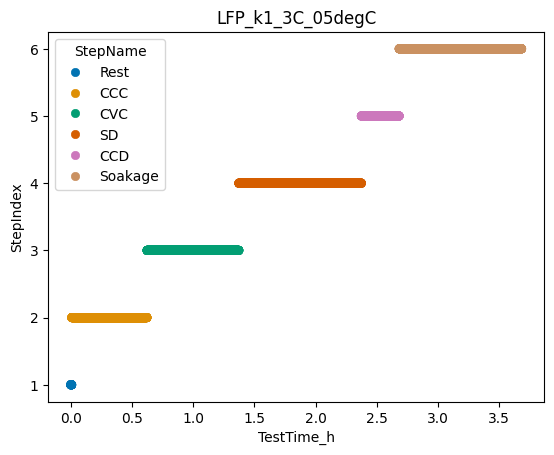

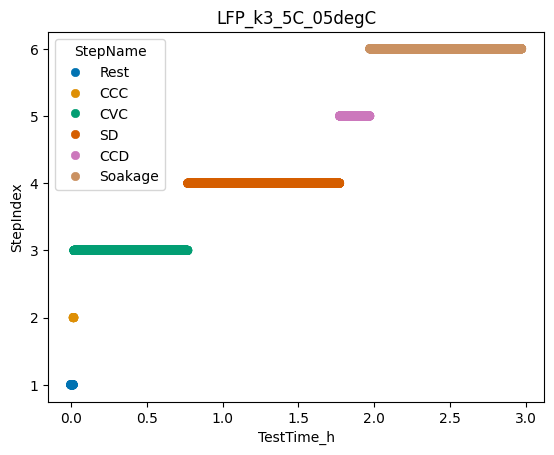

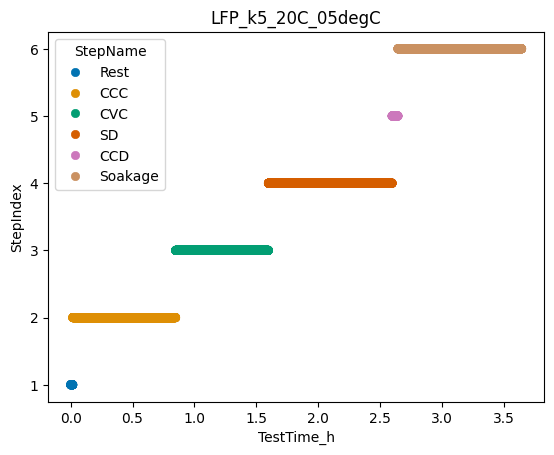

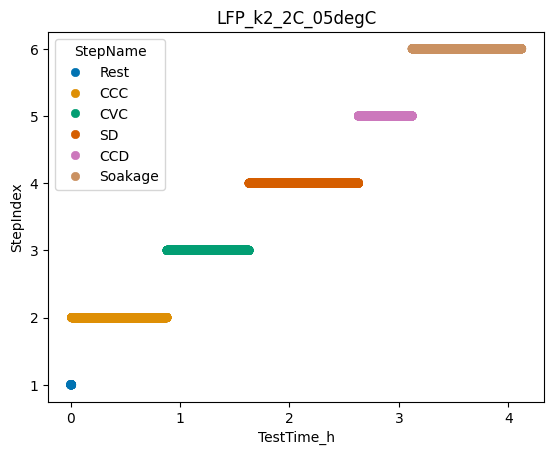

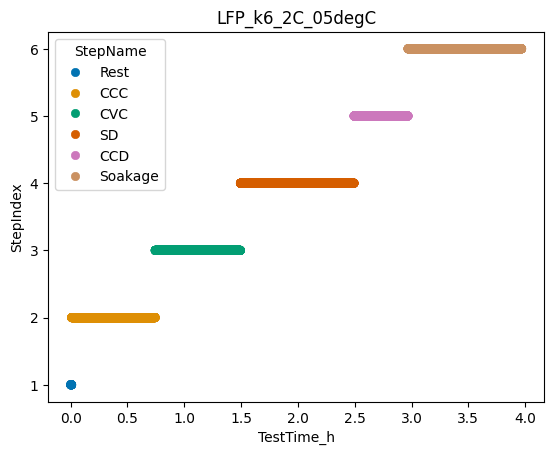

In [ ]:
num_plots = 5

for f in data.file.unique()[:num_plots]:
    fig, ax = plt.subplots()
    sns.scatterplot(data[data.file == f],
                    x = 'TestTime_h',
                    y = 'StepIndex',
                    hue = 'StepName',
                    palette = 'colorblind',
                    edgecolor = None)
    plt.title(f)
    plt.show()

Interesting, this is only 1 cycle.

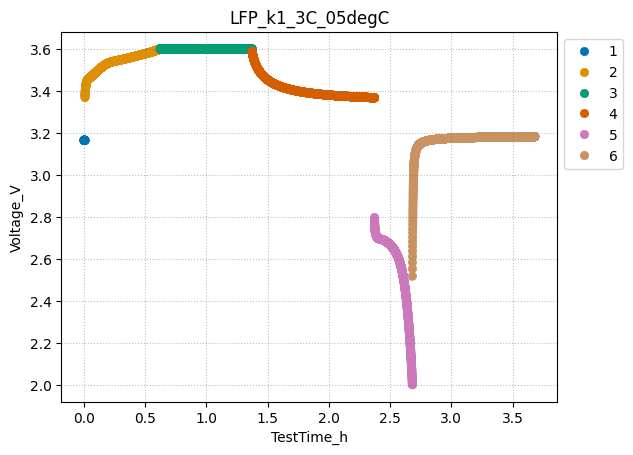

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data[data.file == data.file.unique()[0]],
                x = 'TestTime_h',
                y = 'Voltage_V',
                hue = 'StepIndex',
                palette = 'colorblind',
                edgecolor = None)
plt.grid(c = 'grey', linestyle = ':', alpha = 0.5)
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.title(data.file.unique()[0])
plt.show()

## Looking at times

In [ ]:
grouped = data.groupby('file', as_index = False).DateTime.agg(['min', 'max'])
print(grouped.shape)
grouped.head()


(48, 3)


,file,min,max
0,LFP_k1_0_05C_05degC,2019-11-19 15:10:57.823,2019-11-20 15:54:52.104
1,LFP_k1_10C_05degC,2019-12-02 15:27:10.296,2019-12-02 18:20:36.117
2,LFP_k1_15C_05degC,2019-12-02 11:46:05.820,2019-12-02 15:04:59.976
3,LFP_k1_1C_05degC,2019-11-18 13:21:44.076,2019-11-18 17:29:49.680
4,LFP_k1_20C_05degC,2020-01-17 11:38:52.976,2020-01-17 14:34:40.419


In [ ]:
grouped = grouped.rename(columns = {'min':'minDT', 'max':'maxDT'})
grouped['Duration_h'] = (grouped.maxDT - grouped.minDT).dt.total_seconds() / 3600
grouped.head()

,file,minDT,maxDT,Duration_h
0,LFP_k1_0_05C_05degC,2019-11-19 15:10:57.823,2019-11-20 15:54:52.104,24.731745
1,LFP_k1_10C_05degC,2019-12-02 15:27:10.296,2019-12-02 18:20:36.117,2.890506
2,LFP_k1_15C_05degC,2019-12-02 11:46:05.820,2019-12-02 15:04:59.976,3.315043
3,LFP_k1_1C_05degC,2019-11-18 13:21:44.076,2019-11-18 17:29:49.680,4.134890
4,LFP_k1_20C_05degC,2020-01-17 11:38:52.976,2020-01-17 14:34:40.419,2.929845


In [ ]:
print(data.columns)

grouped[['battery', 'sample_num', 'C_rate', 'Temp_C']] = grouped.file.apply(info_from_filename).apply(pd.Series)

grouped.head()

Index(['DateTime', 'TestTime_s', 'StepTime_s', 'StepIndex', 'Voltage_V',
       'Current_A', 'Temp_degC', 'file', 'battery', 'sample_num', 'C_rate',
       'Temp_C', 'StepName', 'TestTime_h', 'StepTime_h'],
      dtype='object')


,file,minDT,maxDT,Duration_h,battery,sample_num,C_rate,Temp_C
0,LFP_k1_0_05C_05degC,2019-11-19 15:10:57.823,2019-11-20 15:54:52.104,24.731745,LFP,k1,0.05,5
1,LFP_k1_10C_05degC,2019-12-02 15:27:10.296,2019-12-02 18:20:36.117,2.890506,LFP,k1,10.00,5
2,LFP_k1_15C_05degC,2019-12-02 11:46:05.820,2019-12-02 15:04:59.976,3.315043,LFP,k1,15.00,5
3,LFP_k1_1C_05degC,2019-11-18 13:21:44.076,2019-11-18 17:29:49.680,4.134890,LFP,k1,1.00,5
4,LFP_k1_20C_05degC,2020-01-17 11:38:52.976,2020-01-17 14:34:40.419,2.929845,LFP,k1,20.00,5


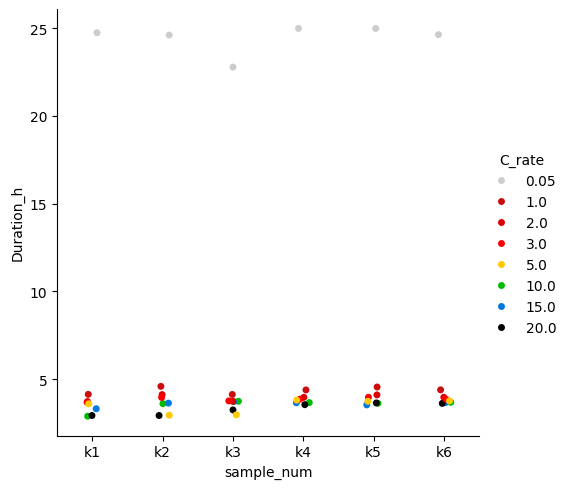

In [ ]:
# fig, ax = plt.subplots()
sns.catplot(grouped,
            # ax = ax,
            x = 'sample_num',
            y = 'Duration_h',
            hue = 'C_rate', #'battery', ### I only have 1 for now
            legend = 'full',
            palette = 'nipy_spectral_r'
            )
plt.show()

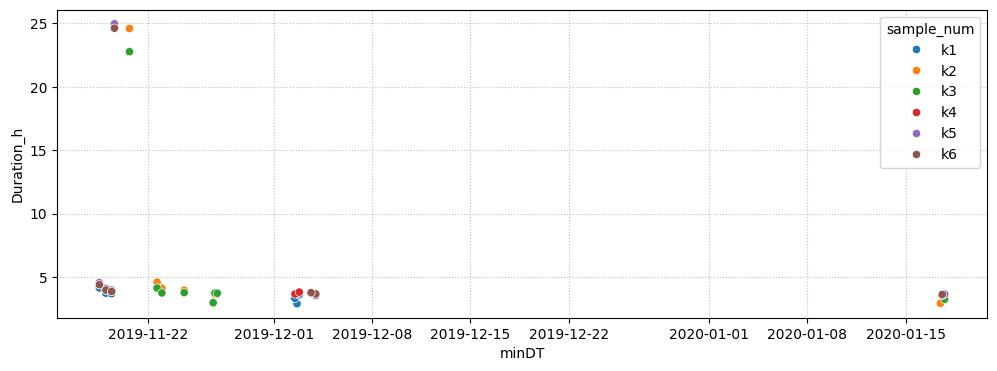

In [ ]:
fig, ax = plt.subplots(figsize = (12, 4))
sns.scatterplot(grouped,
                x = 'minDT',
                y = 'Duration_h',
                hue = 'sample_num'
                )
### to do: rotate xlabels
plt.grid(c = 'gray', linestyle = ':', alpha = 0.5)
plt.show()

In [ ]:
data.head()

,DateTime,TestTime_s,StepTime_s,StepIndex,Voltage_V,Current_A,Temp_degC,file,battery,sample_num,C_rate,Temp_C,StepName,TestTime_h,StepTime_h
0,2019-11-19 10:19:43.065,1.0004,1.0002,1,3.164373,0.0,6.710077,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.000278,0.000278
1,2019-11-19 10:19:44.065,2.0004,2.0002,1,3.164435,0.0,6.727111,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.000556,0.000556
2,2019-11-19 10:19:45.065,3.0004,3.0002,1,3.164454,0.0,6.727111,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.000833,0.000833
3,2019-11-19 10:19:46.066,4.0013,4.0011,1,3.164497,0.0,6.727111,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.001111,0.001111
4,2019-11-19 10:19:47.066,5.0009,5.0007,1,3.164391,0.0,6.661114,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.001389,0.001389


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


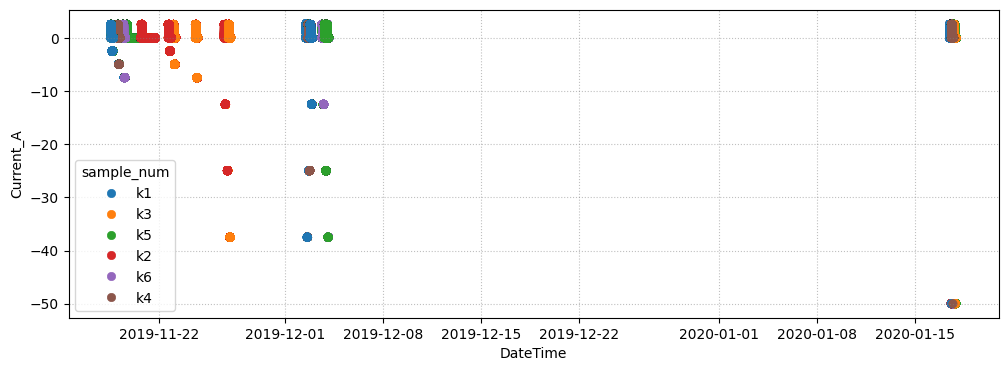

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


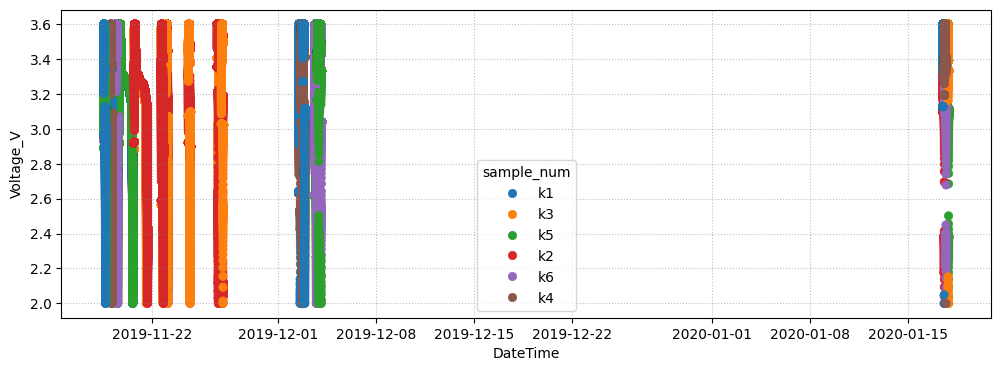

In [ ]:
### to do: plot data, x = DateTime, y = ??
### hue = sample_num
fig, ax = plt.subplots(figsize = (12, 4))
sns.scatterplot(data,
                x = 'DateTime',
                y = 'Current_A',
                hue = 'sample_num',
                edgecolor = None,
                )
### to do: rotate xlabels
plt.grid(c = 'gray', linestyle = ':', alpha = 0.5)
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
sns.scatterplot(data,
                x = 'DateTime',
                y = 'Voltage_V',
                hue = 'sample_num',
                edgecolor = None,
                )
### to do: rotate xlabels
plt.grid(c = 'gray', linestyle = ':', alpha = 0.5)
plt.show()

# Data Engineering: Record data

plots to create:
* dQ/dV vs V
* Ragone plots

In [ ]:
### dQ/dV, including plots
### if only have step time, create experiment time
### anything else I think of

In [ ]:
data.head()

,DateTime,TestTime_s,StepTime_s,StepIndex,Voltage_V,Current_A,Temp_degC,file,battery,sample_num,C_rate,Temp_C,StepName,TestTime_h,StepTime_h
0,2019-11-19 10:19:43.065,1.0004,1.0002,1,3.164373,0.0,6.710077,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.000278,0.000278
1,2019-11-19 10:19:44.065,2.0004,2.0002,1,3.164435,0.0,6.727111,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.000556,0.000556
2,2019-11-19 10:19:45.065,3.0004,3.0002,1,3.164454,0.0,6.727111,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.000833,0.000833
3,2019-11-19 10:19:46.066,4.0013,4.0011,1,3.164497,0.0,6.727111,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.001111,0.001111
4,2019-11-19 10:19:47.066,5.0009,5.0007,1,3.164391,0.0,6.661114,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.001389,0.001389


In [ ]:
data['dt'] = data.StepTime_s.diff()
data['dQ'] = data.Current_A * data.dt
data['dV'] = data.Voltage_V.diff()
data['dQ/dV_C/V'] = data.dQ / data.dV

data.head()

,DateTime,TestTime_s,StepTime_s,StepIndex,Voltage_V,Current_A,Temp_degC,file,battery,sample_num,C_rate,Temp_C,StepName,TestTime_h,StepTime_h,dt,dQ,dV,dQ/dV_C/V
0,2019-11-19 10:19:43.065,1.0004,1.0002,1,3.164373,0.0,6.710077,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.000278,0.000278,NaN,NaN,NaN,NaN
1,2019-11-19 10:19:44.065,2.0004,2.0002,1,3.164435,0.0,6.727111,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.000556,0.000556,1.0000,0.0,0.000063,0.0
2,2019-11-19 10:19:45.065,3.0004,3.0002,1,3.164454,0.0,6.727111,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.000833,0.000833,1.0000,0.0,0.000019,0.0
3,2019-11-19 10:19:46.066,4.0013,4.0011,1,3.164497,0.0,6.727111,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.001111,0.001111,1.0009,0.0,0.000042,0.0
4,2019-11-19 10:19:47.066,5.0009,5.0007,1,3.164391,0.0,6.661114,LFP_k1_3C_05degC,LFP,k1,3.0,5,Rest,0.001389,0.001389,0.9996,0.0,-0.000106,-0.0


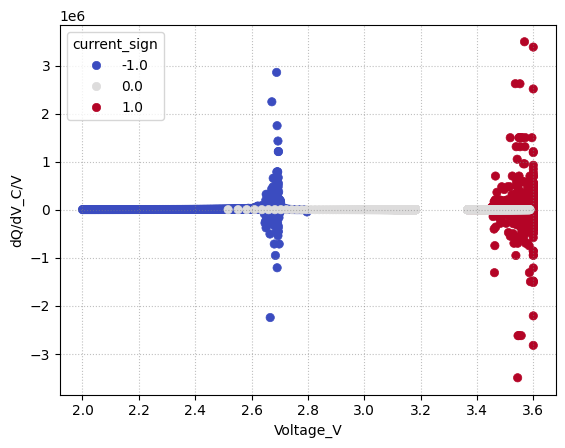

In [ ]:
### checking, using a random sample and c-rate
sample = "k1"
Crate = 3.0

d = data[(data.sample_num == sample) & (data.C_rate == Crate)].reset_index(drop=True)
d['current_sign'] = d.Current_A.apply(np.sign)
d = d[d['dQ/dV_C/V'] < 1e7]

fig, ax = plt.subplots()
sns.scatterplot(d,
                ax = ax,
                x = 'Voltage_V',
                y = 'dQ/dV_C/V',
                hue = 'current_sign',
                palette = 'coolwarm',
                edgecolor = None,
                )
plt.grid(c = 'gray', linestyle = ':', alpha = 0.5)
plt.show()

In [ ]:
data.dV.describe()

,dV
count,1.091278e+06
mean,-6.741350e-07
std,6.248913e-03
min,-1.382544e+00
25%,-6.604195e-05
50%,-2.384186e-06
75%,6.103516e-05
max,1.311629e+00


20394
0.912965428639239


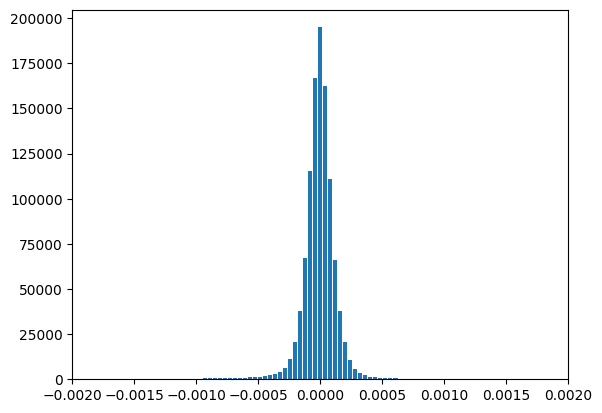

In [ ]:
### need to smooth data
print(data.dV.nunique())

middle, middle_steps = 0.002, 100
bins = [-2, -1, 1, 2] + list(np.linspace(-middle, middle, middle_steps))
bins = sorted(bins)

print(data[(data.dV > middle) | (data.dV < -middle)].shape[0] / len(data) * 100)

### using a mpl histogram because sns was being too slow
fig, ax = plt.subplots()
plt.hist(data.dV, bins = bins,
         rwidth = 0.8)
plt.xlim([-middle, middle])
plt.show()

There are clearly some outliers here

# Data Engineering: Step Data

* energy
* capacity
* IR drop
* resistance
* energy efficiency
* coulombic efficiency

In [ ]:
### start coding here

# Data Engineering: Cycle Data

transform / reshape step data into cycle data

* efficiencies